In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import SIMION_utils as su
import importlib
import pandas as pd

In [2]:
base = 'D:/Simulation Data/SIMION/241021/'
files = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8']
ftype = '.csv'

In [3]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'run30000':
        da = np.array([i for i in data.values[38:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[35:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    else:
        da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
        #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 2.9e+5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

In [4]:
Vcage = [0, 0.25, 0.5, 0.75, -0.25, -0.5, -0.75, -5]

In [5]:
effs

[0.2871019933067285,
 0.2699353080165505,
 0.12278573912454911,
 0.00576134734184337,
 0.26370767506148535,
 0.3214928588868502,
 0.29996556469622127,
 0.3111195491047608]

<ErrorbarContainer object of 3 artists>

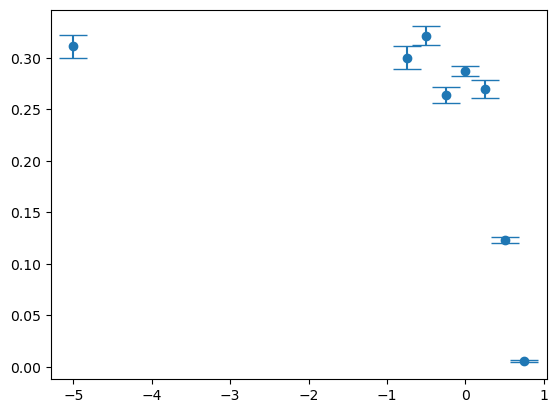

In [6]:
plt.errorbar(Vcage, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')

In [7]:
# Looking at some trajectories

In [8]:
base = 'D:/Simulation Data/SIMION/241022/'
files = ['run0', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7']
ftype = '.csv'

In [9]:
times = []
xs= []
ys = []
zs = []
rs = []
for file in files: 
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij'))
    time = np.transpose(data.values[27:-1, 1:2])[0].astype('float')
    x = np.transpose(data.values[27:-1, 2:3])[0].astype('float')
    y = np.transpose(data.values[27:-1, 3:4])[0].astype('float')
    z = np.transpose(data.values[27:-1, 4:5])[0].astype('float')
    times.append(time)
    xs.append(x-6.5)
    ys.append(y-6.5)
    zs.append(z)
    r = np.sqrt((x-6.5)**2+(y-6.5)**2+z**2)
    rs.append(r)

C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3486066639.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3486066639.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3486066639.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3486066639.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3486066639.py:

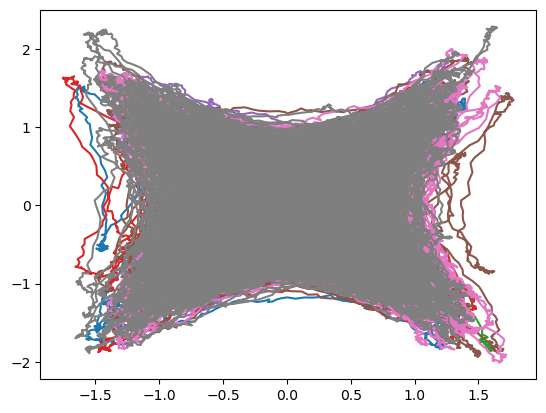

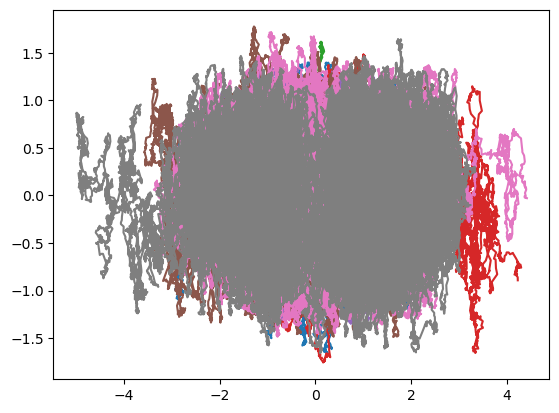

In [10]:
for i in range(len(files)):
    plt.plot(xs[i], ys[i])
plt.figure()
for i in range(len(files)):
    plt.plot(zs[i], xs[i])

Text(0.5, 0, 'z (mm)')

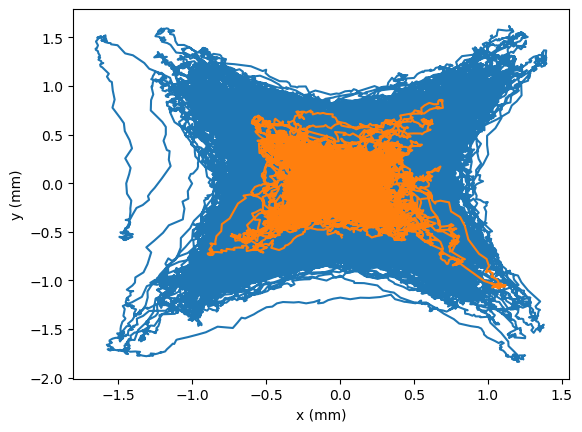

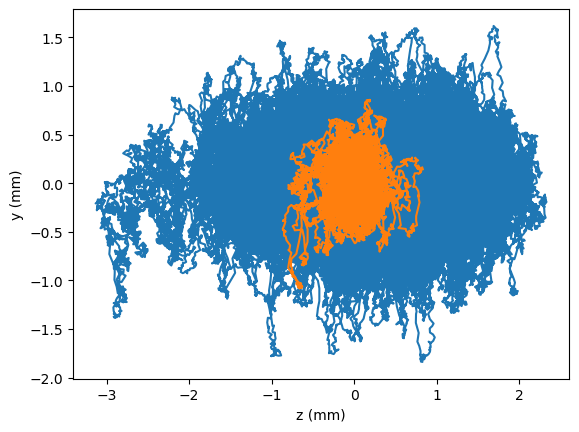

In [20]:
plt.plot(xs[0], ys[0])
plt.plot(xs[1], ys[1])
plt.ylabel('y (mm)')
plt.xlabel('x (mm)')
plt.figure()
plt.plot(zs[0], ys[0])
plt.plot(zs[1], ys[1])
plt.ylabel('y (mm)')
plt.xlabel('z (mm)')

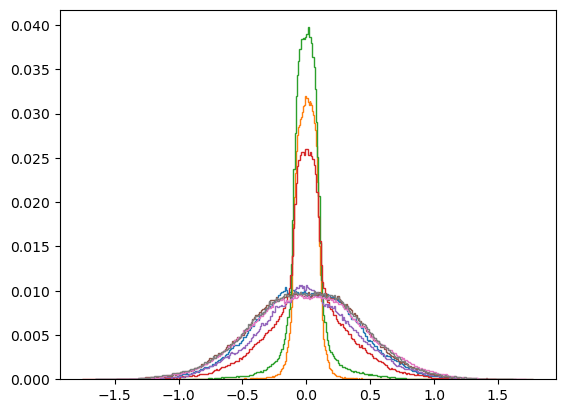

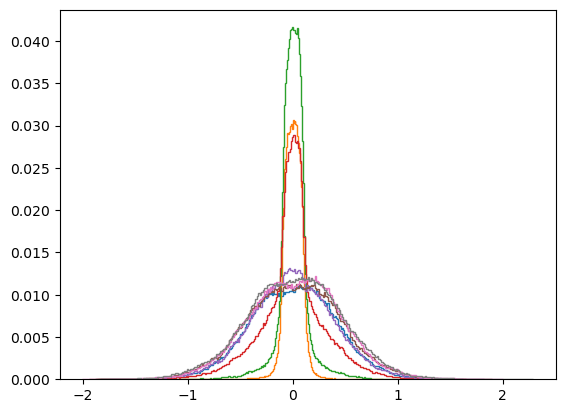

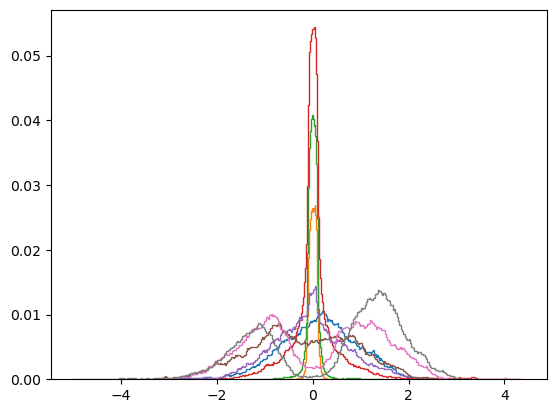

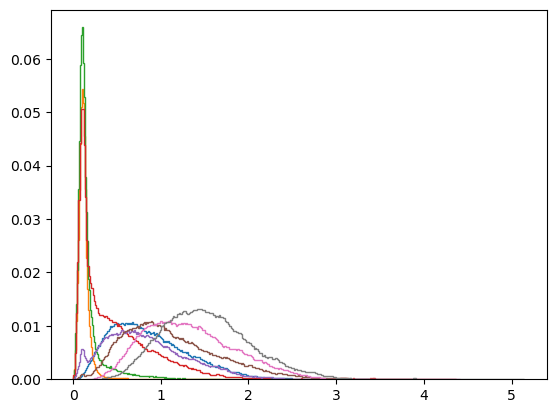

In [81]:
plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(xs[i], bins = 300)
    plt.stairs(counts/sum(counts), bins)

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(ys[i], bins = 300)
    plt.stairs(counts/sum(counts), bins)

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(zs[i], bins = 300)
    plt.stairs(counts/sum(counts), bins)

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(rs[i], bins = 300)
    plt.stairs(counts/sum(counts), bins)

In [12]:
# So V = 0.75V for the shell voltage isn't perfect but it looks like the best so let's just use that as an approximate
# Shame it has a shit efficiency

In [21]:
# First let's mess around with charge to make sure that's actually effecting things.

base = 'D:/Simulation Data/SIMION/241024/'
files = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']#, 'run6', 'run7']
ftype = '.csv'

charge = [1000, 100, 10, 1000, 100, 10]

In [22]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
    #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 2.9e+5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

First 3 1 Torr
Second 3 15 Torr
150 V, 200 kHz, shell at 0.75 V, 0 offset, only DC on rings, 17 V and 8V on rings
Radon in cylinder from edge of Paul trap

<ErrorbarContainer object of 3 artists>

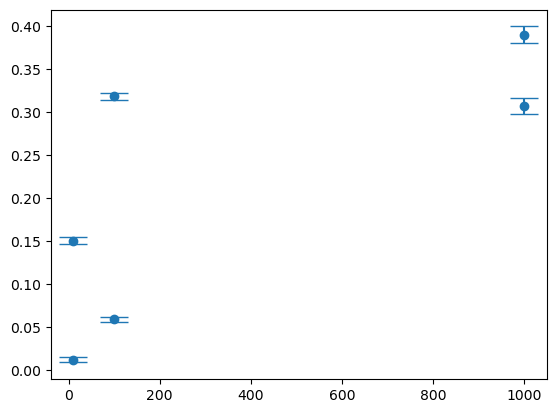

In [23]:
plt.errorbar(charge, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')

In [24]:
effs

[0.3903183261183259,
 0.3187321428571428,
 0.1507373015873016,
 0.307006746031746,
 0.058896356421356405,
 0.01202088744588745]

15 Torr, 200 kHz, shell at 0.75 V, 0 offset, only DC on rings, 17 V and 8V on rings
Radon in cylinder from edge of Paul trap

In [25]:
# First let's mess around with charge to make sure that's actually effecting things.

base = 'D:/Simulation Data/SIMION/241024/'
files = ['run7', 'run8', 'run9', 'run10', 'run11', 'run12', 'run13']
ftype = '.csv'

V = [170, 150, 130, 110, 90, 160, 140]#, 70]

In [26]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
    #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 2.9e+5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

<ErrorbarContainer object of 3 artists>

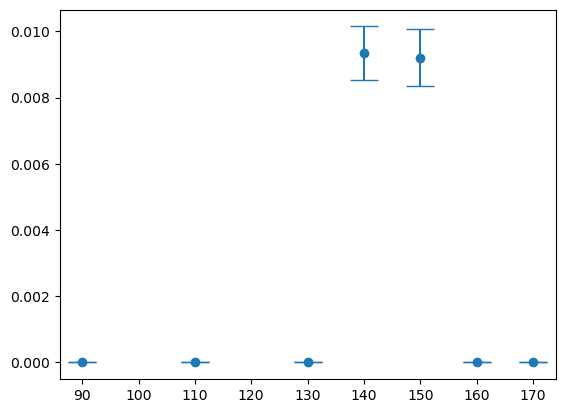

In [27]:
plt.errorbar(V, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')

In [28]:
# First let's mess around with charge to make sure that's actually effecting things.

base = 'D:/Simulation Data/SIMION/241025/'
files = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
ftype = '.csv'

V = [150, 100, 120, 110, 130, 140, 150, 100, 160, 170]

In [29]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
    #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 2.9e+5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

<ErrorbarContainer object of 3 artists>

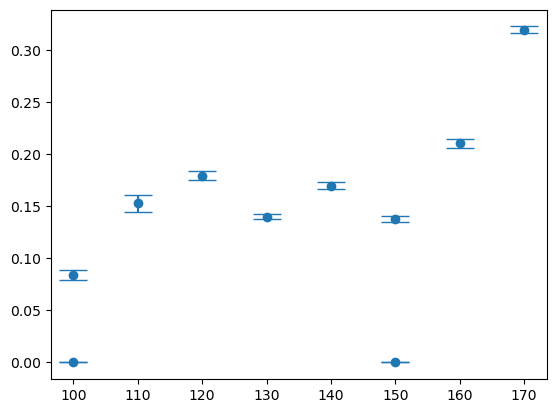

In [30]:
plt.errorbar(V, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')

In [31]:
base = 'D:/Simulation Data/SIMION/241025/'
# These are all at 100 V rf, 11 is no surface, then surface voltage 0.75, 0.8, 0.85, 0.9
files = ['run11', 'run12', 'run13', 'run14', 'run15']
# These are all at 150 V rf, 18 is no surface, then 16 and 17 surface voltage 0.85, 1, then 19 and 20 surface voltage 1 but endcaps 10/19 and 9/18
#files = [ 'run18', 'run16', 'run17', 'run19', 'run20']
ftype = '.csv'

In [32]:
times = []
xs= []
ys = []
zs = []
rs = []
for file in files: 
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij'))
    time = np.transpose(data.values[27:-1, 1:2])[0].astype('float')
    x = np.transpose(data.values[27:-1, 2:3])[0].astype('float')
    y = np.transpose(data.values[27:-1, 3:4])[0].astype('float')
    z = np.transpose(data.values[27:-1, 4:5])[0].astype('float')
    times.append(time)
    xs.append(x-6.5)
    ys.append(y-6.5)
    zs.append(z)
    r = np.sqrt((x-6.5)**2+(y-6.5)**2)
    rs.append(r)

C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3246412143.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3246412143.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3246412143.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3246412143.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\3246412143.py:

Text(0.5, 0, 'r position (mm)')

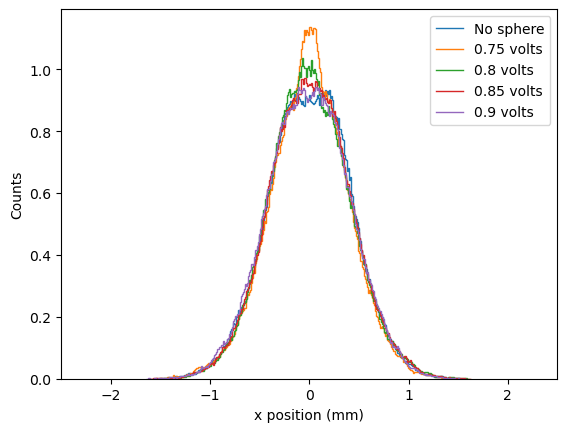

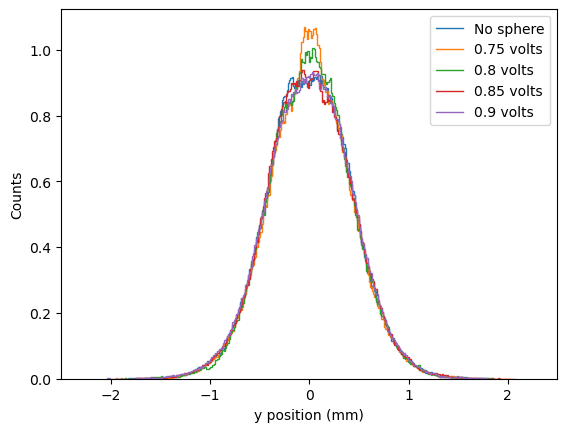

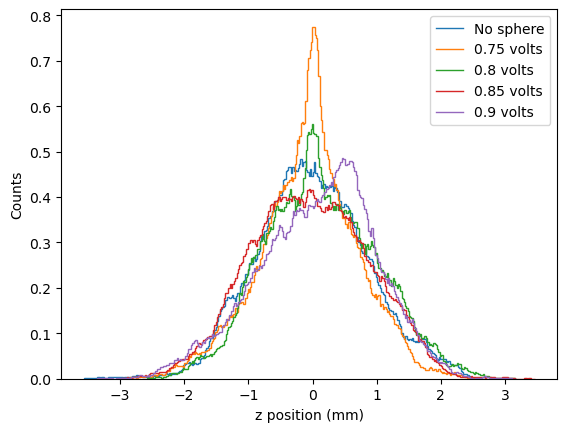

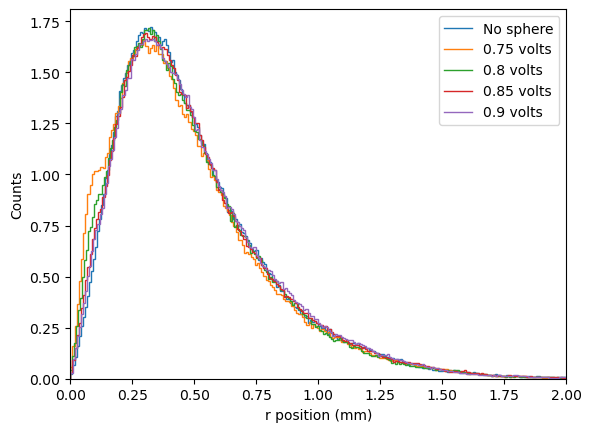

In [37]:
labels = ['No sphere', '0.75 volts', '0.8 volts', '0.85 volts', '0.9 volts']

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(xs[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins, label = labels[i])
plt.xlim(-2.5, 2.5)
plt.legend()
plt.ylabel('Counts')
plt.xlabel('x position (mm)')

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(ys[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins, label = labels[i])
plt.xlim(-2.5, 2.5)
plt.legend()
plt.ylabel('Counts')
plt.xlabel('y position (mm)')

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(zs[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins, label = labels[i])
plt.legend()
plt.ylabel('Counts')
plt.xlabel('z position (mm)')

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(rs[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins, label = labels[i])
plt.xlim(0, 2)
plt.legend()
plt.ylabel('Counts')
plt.xlabel('r position (mm)')

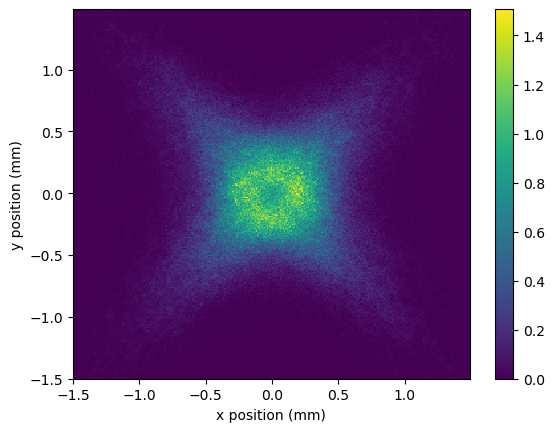

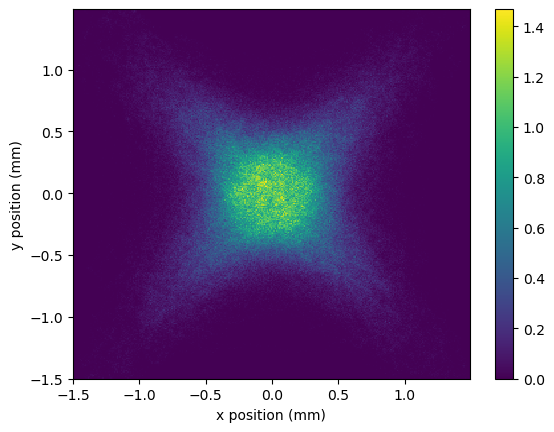

In [80]:
edges = np.arange(-1.5, 1.5, 0.01)

plt.hist2d(xs[0], ys[0], bins = edges, density=True)
plt.ylabel('y position (mm)')
plt.xlabel('x position (mm)')
plt.colorbar()

plt.figure()
plt.hist2d(xs[4], ys[4], bins = edges, density = True)
plt.ylabel('y position (mm)')
plt.xlabel('x position (mm)')
plt.colorbar()

(array([2.37669690e-02, 6.88316116e-02, 1.07568684e-01, 1.57726249e-01,
        2.10198778e-01, 2.56961061e-01, 3.00791056e-01, 3.52646261e-01,
        4.05427452e-01, 4.73641740e-01, 5.26268600e-01, 5.87075001e-01,
        6.44331790e-01, 7.20879950e-01, 7.82920999e-01, 8.51752610e-01,
        9.01910175e-01, 9.84785904e-01, 1.02398597e+00, 1.10037980e+00,
        1.14559877e+00, 1.20640517e+00, 1.28465097e+00, 1.31212189e+00,
        1.40827008e+00, 1.43666698e+00, 1.46984814e+00, 1.49654739e+00,
        1.53636478e+00, 1.55627348e+00, 1.59362157e+00, 1.60890034e+00,
        1.65411931e+00, 1.68112723e+00, 1.69470836e+00, 1.69193040e+00,
        1.71646902e+00, 1.70566585e+00, 1.70427688e+00, 1.72295092e+00,
        1.70535719e+00, 1.69563434e+00, 1.65442797e+00, 1.67186737e+00,
        1.63559959e+00, 1.65288466e+00, 1.66075554e+00, 1.63359329e+00,
        1.59701685e+00, 1.55118056e+00, 1.55797112e+00, 1.50164031e+00,
        1.48512690e+00, 1.46074261e+00, 1.42046223e+00, 1.390522

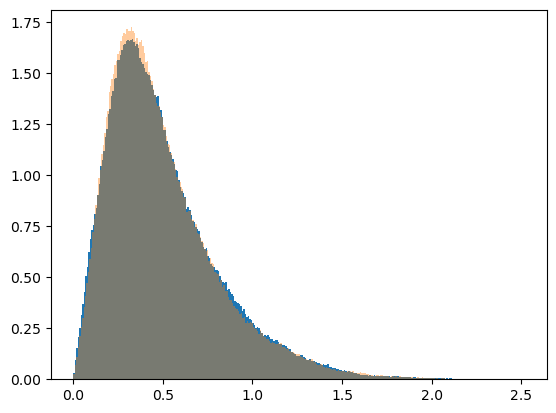

In [72]:


plt.hist(np.sqrt(xs[4]**2+ys[4]**2), bins = 300, density = "True")
plt.hist(np.sqrt(xs[0]**2+ys[0]**2), bins = 300, density = "True", alpha = 0.4)

In [149]:
# First let's mess around with charge to make sure that's actually effecting things.

base = 'D:/Simulation Data/SIMION/241114/'
files = ['run1']
ftype = '.csv'

V_surf = [0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]

In [151]:
effs = []
errs = []
for file in files:
    print(file)
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'run8':
        da = np.array([i for i in data.values[37:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
    
    else:
        da = np.array([i for i in data.values[29:-1, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
    #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

run1


In [152]:
effs

[0.0]

<ErrorbarContainer object of 3 artists>

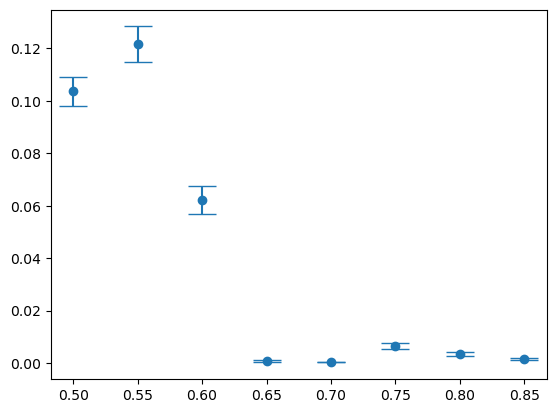

In [95]:
plt.errorbar(V_surf, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')

In [148]:
10*1.6*10**(-19)/4/np.pi/8.854/10**(-12)/100e-6

0.0001438038790078115

In [14]:
effs

[0.001494718302942991]

In [154]:
base = 'D:/Simulation Data/SIMION/241025/'
# These are all at 100 V rf, 11 is no surface, then surface voltage 0.75, 0.8, 0.85, 0.9
files = ['run11']
ftype = '.csv'

base2 = 'D:/Simulation Data/SIMION/241113/'
# These are all at 100 V rf,endcap = 0.1,  factor = 10, 100, 1000, 10000, 100000 then factor = 100000 and sphere = 0
#files2 = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']

# These are all at 100 V rf, factor = 10000, sphere = -0.00014, change endcap = 0.1, 1, 10, 0
files2 = ['run7', 'run8', 'run9', 'run10']
ftype = '.csv'

In [155]:
times = []
xs= []
ys = []
zs = []
rs = []
for file in files: 
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij'))
    time = np.transpose(data.values[27:-1, 1:2])[0].astype('float')
    x = np.transpose(data.values[27:-1, 2:3])[0].astype('float')
    y = np.transpose(data.values[27:-1, 3:4])[0].astype('float')
    z = np.transpose(data.values[27:-1, 4:5])[0].astype('float')
    times.append(time)
    xs.append(x-6.5)
    ys.append(y-6.5)
    zs.append(z)
    r = np.sqrt((x-6.5)**2+(y-6.5)**2)
    rs.append(r)

for file in files2: 
    filename = base2+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij'))
    time = np.transpose(data.values[27:-1, 1:2])[0].astype('float')
    x = np.transpose(data.values[27:-1, 2:3])[0].astype('float')
    y = np.transpose(data.values[27:-1, 3:4])[0].astype('float')
    z = np.transpose(data.values[27:-1, 4:5])[0].astype('float')
    times.append(time)
    xs.append(x-6.5)
    ys.append(y-6.5)
    zs.append(z)
    r = np.sqrt((x-6.5)**2+(y-6.5)**2)
    rs.append(r)

C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\1265688318.py:8: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\1265688318.py:22: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\1265688318.py:22: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\1265688318.py:22: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_14212\1265688318.

(0.0, 2.0)

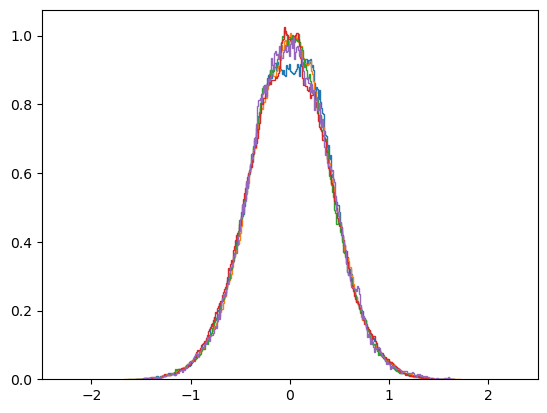

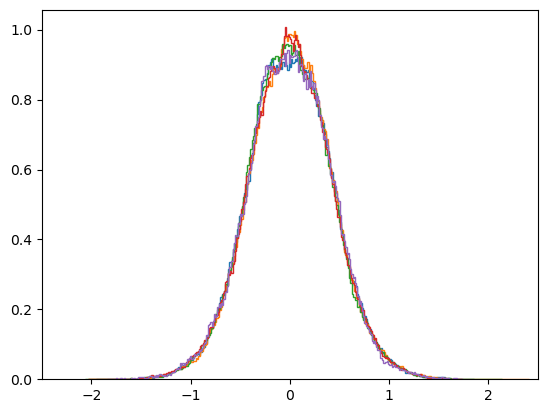

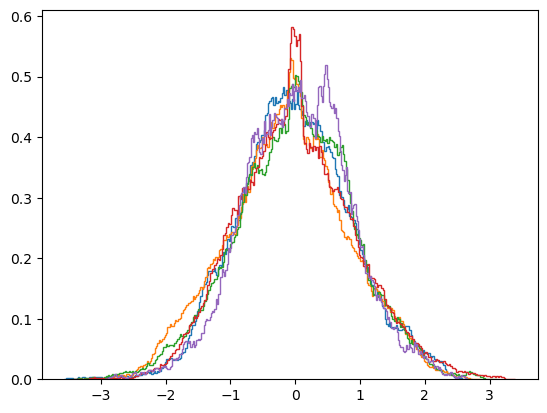

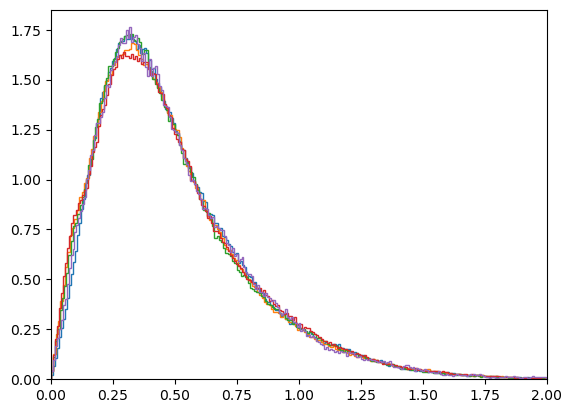

In [156]:
plt.figure()
for i in range(len(files)+len(files2)):
    counts, bins = np.histogram(xs[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins)
plt.xlim(-2.5, 2.5)

plt.figure()
for i in range(len(files)+len(files2)):
    counts, bins = np.histogram(ys[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins)
plt.xlim(-2.5, 2.5)

plt.figure()
for i in range(len(files)+len(files2)):
    counts, bins = np.histogram(zs[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins)

plt.figure()
for i in range(len(files)+len(files2)):
    counts, bins = np.histogram(rs[i], bins = 300)
    area = np.trapz(counts, bins[1:])
    plt.stairs(counts/area, bins)
plt.xlim(0, 2)

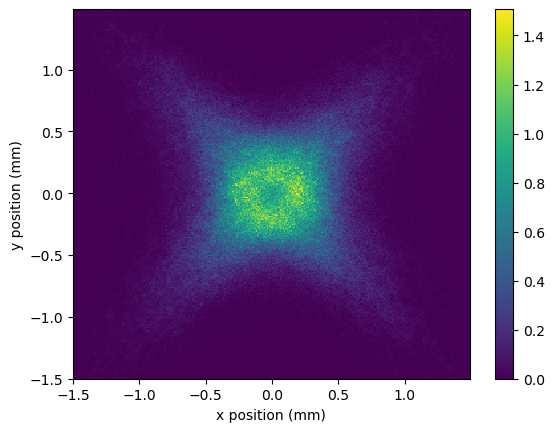

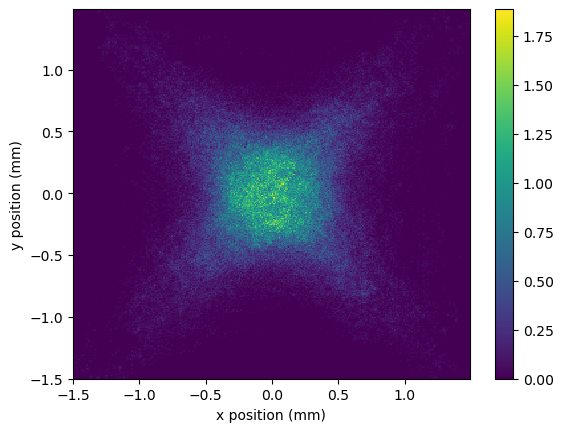

In [157]:
edges = np.arange(-1.5, 1.5, 0.01)

plt.hist2d(xs[0], ys[0], bins = edges, density=True)
plt.ylabel('y position (mm)')
plt.xlabel('x position (mm)')
plt.colorbar()

plt.figure()
plt.hist2d(xs[4], ys[4], bins = edges, density = True)
plt.ylabel('y position (mm)')
plt.xlabel('x position (mm)')
plt.colorbar()

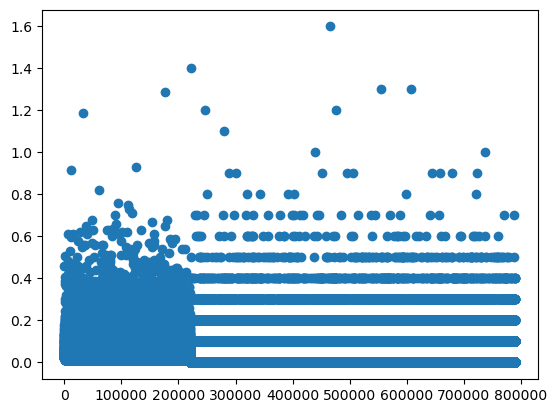

In [163]:
plt.plot(times[0][1:] - times[0][:-1], 'o')

In [207]:
i = 0
for j in range(len(xs[0])):
    if np.abs(xs[0][j]) < 1*10**(-1) and np.abs(ys[0][j]) < 1*10**(-1) and np.abs(zs[0][j]) < 1*10**(-1):
        i+=1

In [209]:
i/len(xs[0])

0.0033845593240497294

In [201]:
time[-1]/10**6

0.0152479

(-0.0001, 0.0001)

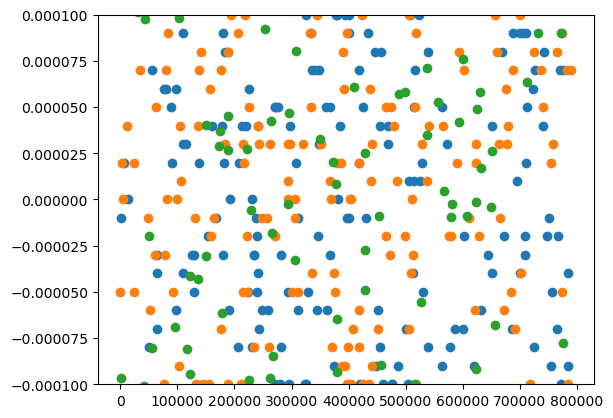

In [189]:
plt.plot(xs[0], 'o')
plt.plot(ys[0], 'o')
plt.plot(zs[0], 'o')
plt.ylim(-0.0001, 0.0001)